# **Algoritma *K-Means***

## **Pengertian *K-Means Clustering***

**K-Means Clustering** adalah salah satu metode pembelajaran tanpa pengawasan dalam data mining dan machine learning yang digunakan untuk mengelompokkan data ke dalam beberapa cluster (kelompok) berdasarkan kesamaan atau kedekatan karakteristik (fitur) data tersebut.


## **Manfaat *Clustering***


- Clustering adalah teknik untuk membagi data ke dalam kelompok-kelompok yang mirip. Metode ini sangat bermanfaat dalam analisis dan prediksi berbagai persoalan bisnis, seperti segmentasi pelanggan, strategi pemesanan, dan pemetaan wilayah.
- Clustering juga berguna untuk menganalisis objek di berbagai bidang, seperti pengolahan citra dan pengenalan pola dalam computer vision.

Hasil clustering yang efektif akan membentuk kelompok (cluster) yang memiliki kesamaan tinggi antar anggotanya, dan perbedaan yang jelas dengan anggota kelompok lain. Kemiripan ini biasanya diukur secara numerik—semakin mirip dua objek, maka nilainya semakin tinggi, begitu juga sebaliknya. Kualitas dari hasil clustering sangat dipengaruhi oleh algoritma atau metode yang digunakan.

## **Inertia (Sum Square Error/SSE)**


Dalam algoritma K-Means Clustering, inertia atau Sum Square Error (SSE) adalah ukuran yang digunakan untuk memancarkan seberapa baik data telah dikirimkan ke dalam klaster. Inersia mengukur total jarak kuadrat antara setiap titik data dengan pusat klaster (centroid) tempat data tersebut berada.

Semakin kecil nilai inersia, berarti data semakin dekat dengan pusat klasternya, dan pengelompokan dianggap semakin baik.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**


Analisis Siluet adalah metode evaluasi clustering yang sering dianggap lebih akurat dibandingkan inersia, terutama pada algoritma seperti K-Means.

Hal ini karena Silhouette menjelaskan dua aspek penting sekaligus:

- Kerapatan data dalam klaster itu sendiri

- Jarak antar klaster yang berbeda

Silhouette mengukur seberapa cocok sebuah titik data berada di klasternya sekarang, dibandingkan jika titik tersebut ditempatkan di klaster lain yang paling dekat. Nilai Silhouette menunjukkan seberapa baik sebuah data diposisikan dalam klaster yang sesuai.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik data
ke semua titik lain dalam klaster yang sama (mengukur kedekatan dalam klaster – kohesi).
- $b(i)$: Rata-rata jarak dari titik
ke seluruh titik di klaster terdekat yang lain yang bukan klasternya (mengukur perpecahan antar klaster – pemisahan).
- $s(i)$: Nilai skor siluet untuk titik $i$, dengan jarak antara -1 hingga 1.

Nilai skor
 $s(i)$ Direkam sebagai berikut:
- Jika $s(i) \approx 1$, berarti titik sangat cocok berada di klasternya dan jauh dari klaster lain.
- Jika $s(i) \approx 0$, berarti titik berada di antara dua klaster (tidak terlalu cocok).
- Jika $s(i) \approx -1$, emungkinan titik masuk ke klaster yang salah.

Untuk menampilkan keseluruhan hasil clustering, digunakan rata-rata dari semua nilai
 $s(i)$ pada seluruh data.:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Siluet skor rata-rata seluruh data


## Implementasi dengan menggunakan data Iris

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


## Library yang digunakan

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database

In [3]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3a2b4d8e-cahyanti625-f7a8.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_SEwXstfyAuXfxU81qVv",
        database="defaultdb",
        port=22424
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_sepal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-44ea6f9-cahyanti625-f7a8.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_Dp0q1x-sz9BpvjujgPO",
        database="iris",
        port=22424
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_petal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          64.0         45.0          63.0         53.0
  2     Iris-setosa          15.0         14.0          40.0         30.0
  3     Iris-setosa          26.0         64.0          57.0         42.0
  4     Iris-setosa          17.0         20.0          74.0         62.0
  5     Iris-setosa          24.0         30.0          21.0         45.0
  6     Iris-setosa           1.6          5.0           3.5          2.3
  7     Iris-setosa           1.9          0.4           2.1          3.2
  8     Iris-setosa           1.7          0.3           1.5          4.2
  9     Iris-setosa           1.6          5.0           3.4          5.2
 10     Iris-setosa           5.4          6.7           2.6          3.5
 11     Iris-setosa           7.5          6.3           6.2          5.4
 12     Iris-setosa           2.6          3.0           2.3          4.5
 13     Iris-setosa           1.7     

## Data asli sebelum di normalisasi

Ini adalah data sebelum normalisasi

In [4]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal_length  petal_width  sepal_length  sepal_width
         64.0         45.0          63.0         53.0
         15.0         14.0          40.0         30.0
         26.0         64.0          57.0         42.0
         17.0         20.0          74.0         62.0
         24.0         30.0          21.0         45.0
          1.6          5.0           3.5          2.3
          1.9          0.4           2.1          3.2
          1.7          0.3           1.5          4.2
          1.6          5.0           3.4          5.2
          5.4          6.7           2.6          3.5
          7.5          6.3           6.2          5.4
          2.6          3.0           2.3          4.5
          1.7          0.2           2.5          3.2
          3.5          6.5           4.2          2.4
          7.5          4.6           6.4          7.4
          1.5          0.4           5.7          4.4
          1.3          0.4           5.4          3.9
          1.4          0.3  

## Visualisasi data

### Visualisasi data asli tanpa menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

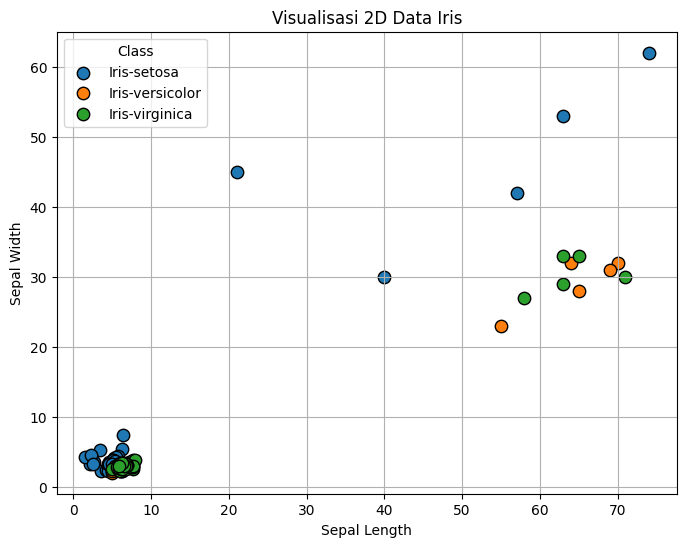

In [5]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


Ini adalah visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

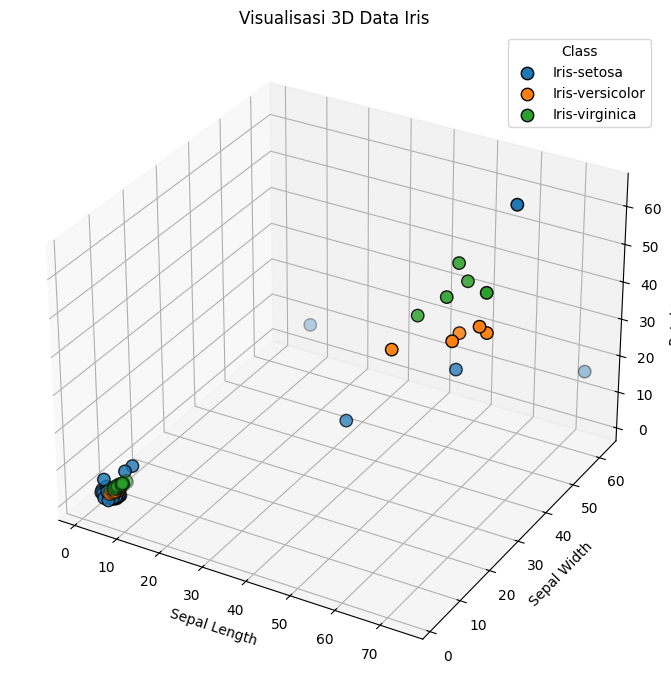

In [6]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi data asli menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi menggunakan PCA

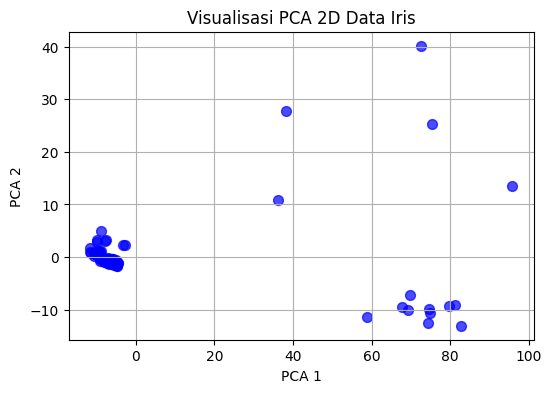

In [7]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Ini adalah visualisasi data Iris secara 3 Dimensi menggunakan PCA

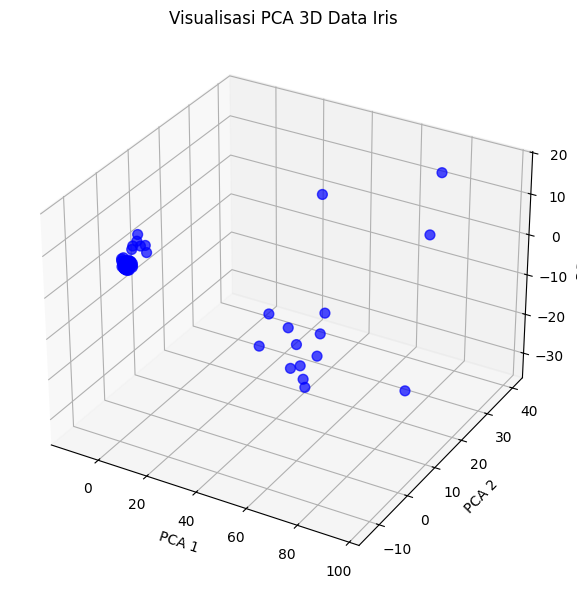

In [8]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan MinMaxScaler

Saya menggunakan MinMaxScaler untuk menyamakan skala semua fitur numerik dalam dataset selama proses pra-pemrosesan data.  Langkah ini sangat penting karena setiap fitur memiliki rentang nilai yang berbeda, yang dapat berdampak pada kinerja model pembelajaran mesin, terutama pada algoritma seperti Support Vector Machine (SVM) dan K-Nearest Neighbors (KNN).

Nilai minimum dan maksimum masing-masing fitur didasarkan pada MinMaxScaler, yang mengubah setiap nilai fitur menjadi berada dalam rentang 0 hingga 1.  Algoritma pembelajaran mesin dapat memperlakukan setiap fitur secara setara dengan skala yang seragam ini. Ini memungkinkan mereka untuk tidak memperhatikan fitur dengan nilai awal yang lebih tinggi.

Setelah melakukan proses normalisasi ini, saya menemukan bahwa model bekerja lebih konsisten dan hasil prediksinya lebih baik.  Dari pengalaman ini, saya belajar bahwa normalisasi adalah bagian penting dalam memastikan kualitas dan keandalan data sebelum digunakan dalam proses pembelajaran mesin, lebih dari sekadar langkah teknis.

In [11]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Berikut adalah data hasil standarisasi menggunakan MinMaxScaler

In [19]:
print (scaled_features);

[[1.         0.70266041 0.84827586 0.85      ]
 [0.22222222 0.21752739 0.53103448 0.46666667]
 [0.3968254  1.         0.76551724 0.66666667]
 [0.25396825 0.3114241  1.         1.        ]
 [0.36507937 0.46791862 0.26896552 0.71666667]
 [0.00952381 0.07668232 0.02758621 0.005     ]
 [0.01428571 0.00469484 0.00827586 0.02      ]
 [0.01111111 0.00312989 0.         0.03666667]
 [0.00952381 0.07668232 0.0262069  0.05333333]
 [0.06984127 0.10328638 0.01517241 0.025     ]
 [0.1031746  0.0970266  0.06482759 0.05666667]
 [0.02539683 0.04538341 0.01103448 0.04166667]
 [0.01111111 0.00156495 0.0137931  0.02      ]
 [0.03968254 0.10015649 0.03724138 0.00666667]
 [0.1031746  0.07042254 0.06758621 0.09      ]
 [0.00793651 0.00469484 0.05793103 0.04      ]
 [0.0047619  0.00469484 0.0537931  0.03166667]
 [0.00634921 0.00312989 0.04965517 0.025     ]
 [0.01111111 0.00312989 0.05793103 0.03      ]
 [0.00793651 0.00312989 0.04965517 0.03      ]
 [0.01111111 0.00156495 0.0537931  0.02333333]
 [0.00793651 

## Clustering menggunakan K-Means

### Clustering dengan 2 cluster dan Visualisasi data

Pada titik ini, saya menggunakan algoritma K-Means untuk menerapkan metode clustering dengan jumlah 2 cluster. Selain itu, saya menghitung nilai Inertia dan Silhouette Score untuk menilai kualitas clustering yang dihasilkan.  Kemudian, hasil klasterisasi digambarkan dalam grafik 2 dimensi menggunakan data Iris. Ini memberikan gambaran visual tentang pembagian klaster yang terbentuk.

[2 Clusters] Inertia: 2.7136, Silhouette Score: 0.9221


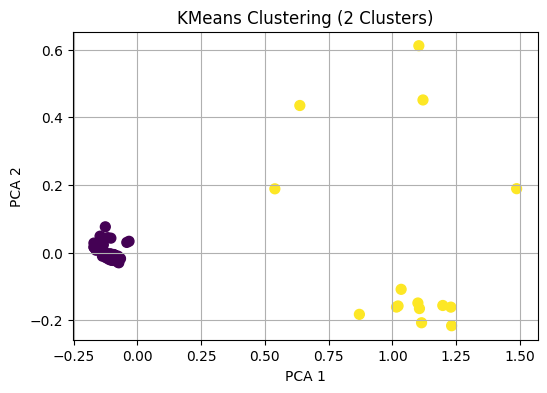

In [13]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 2.7136, Silhouette Score: 0.9221


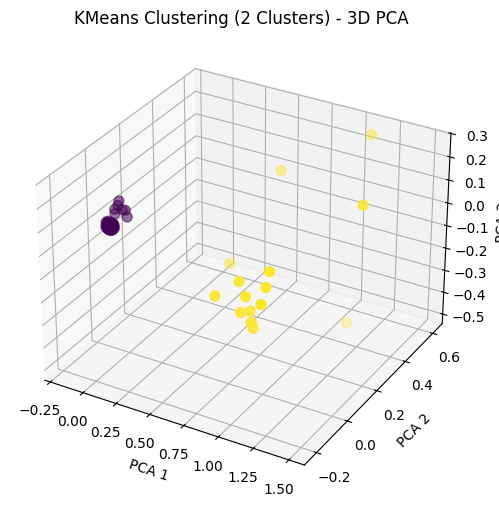

In [14]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Di sini, saya menggunakan K-Means untuk melakukan clustering dengan 3 cluster, dan saya juga menghitung nilai Inertia dan Silhouette Score untuk menilai hasil pengelompokan.  Untuk membuat pemahaman visual lebih mudah, saya kemudian membuat visualisasi 2 dimensi dari data Iris yang sudah dikelompokkan.

[3 Clusters] Inertia: 1.5609, Silhouette Score: 0.9141


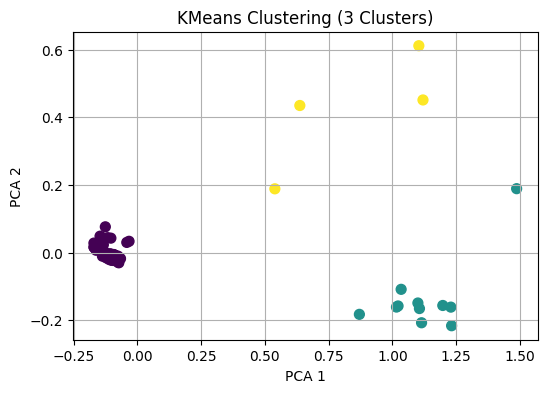

In [15]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 1.5609, Silhouette Score: 0.9141


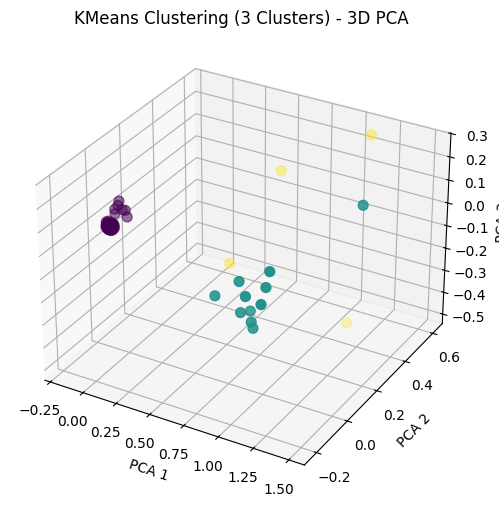

In [16]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Di sini, saya menggunakan algoritma K-Means dengan 4 cluster dan menghitung nilai Inertia dan Skor Silhouette sebagai ukuran kualitas klaster. Untuk memudahkan pemahaman hasil clustering, saya juga membuat visualisasi 2 dimensi pada data Iris yang telah dikelompokkan.

[4 Clusters] Inertia: 1.1705, Silhouette Score: 0.9007


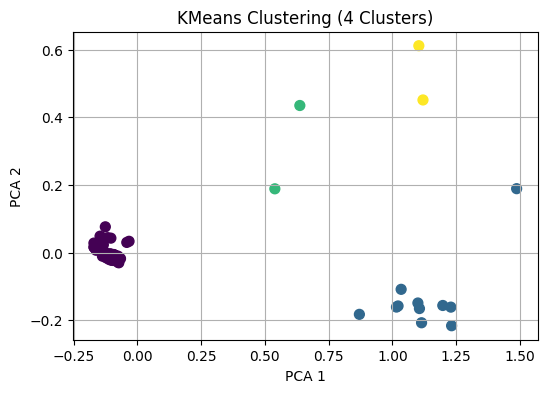

In [17]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 1.1705, Silhouette Score: 0.9007


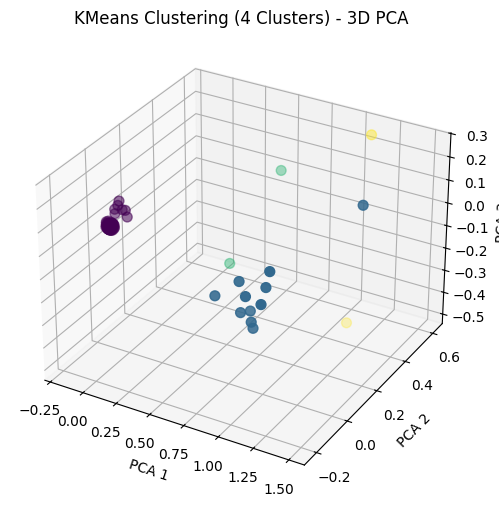

In [18]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
